# Descriptive Statistics

In this notebook the initial exploration of the cities data set is carried out.

## Package import
All needed packages are imported at the top

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from sklearn.decomposition import PCA

## Data loading

The preprocessed data is loaded where the first column is used for index. The first five rows of the dataframe is printed in order to get a better overview of how the data is structured.

In [2]:
df = pd.read_csv(os.path.abspath('../data/Processed/Cities.csv'), index_col=0)

print(df.shape)
df.head()

(331, 81)


,City,cityID,clusterID,Typology,Country,Car_Modeshare_(%),Public_Transit_Modeshare_(%),Bicycle_Modeshare_(%),Walking_Modeshare_(%),Gasoline_Pump_Price_(USD/liter),...,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor,Latitude,Longitude,Continent
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,...,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187,39.290882,-76.610759,North America
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2.0,4.0,1.11,...,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910,-37.814218,144.963161,Oceania
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2.0,60.0,1.02,...,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312,13.524834,2.109823,Africa
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2.0,NaN,0.90,...,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113,21.029450,105.854444,Asia
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,...,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617,43.419754,87.319461,Asia


It can be seen that the dataset consist of 331 rows and 81 columns.

The full list of columns are also shwon below:

In [3]:
print(f"There are {len(df.columns)} in the dataset, and they are:")
df.columns

There are 81 in the dataset, and they are:


Index(['City', 'cityID', 'clusterID', 'Typology', 'Country',
       'Car_Modeshare_(%)', 'Public_Transit_Modeshare_(%)',
       'Bicycle_Modeshare_(%)', 'Walking_Modeshare_(%)',
       'Gasoline_Pump_Price_(USD/liter)', 'Road_Deaths_Rate_(per_1000)',
       'Subway_Length_(km)', 'Subway_Length_Density_(per_km)',
       'Subway_Stations_per_Hundred_Thousand', 'Subway_Ridership_per_Capita',
       'Subway_Age_(years)', 'BRT_Length_(km)',
       'BRT_System_Length_Density_(per_km)',
       'BRT_Stations_per_Hundred_Thousand_Persons',
       'BRT_Fleet_per_Hundred_Thousand_Persons',
       'BRT_Annual_Ridership_per_Capita', 'BRT_Age_(years)',
       'Bikeshare_Stations', 'Bikeshare_Stations_per_Hundred_Thousand_Persons',
       'Bikeshare_Number_of_Bikes',
       'Bikeshare_Bicycles_per_Hundred_Thousand_Persons',
       'Bikeshare_Age_(years)', 'Congestion_(%)', 'Congestion_AM_Peak_(%)',
       'Congestion_PM_Peak_(%)', 'Traffic_Index', 'Travel_Time_Index',
       'Inefficiency_Index', 'Po

It can be seen that there are a wide range of columns that describe the cities. If they all turn out to be relevant for the prediction time will tell. Moreover the data types are also shortly investigated to get an overview of what type data we are working with:

In [4]:
df.dtypes.value_counts()

float64    67
int64      10
object      4
dtype: int64

It is seen that it is primarily numeric data that is available. Only four object columns are apparent which is shwon below:

In [5]:
df.dtypes[df.dtypes == "object"]

City         object
Typology     object
Country      object
Continent    object
dtype: object

Since the Typology only is a title for the cluster_ID it is in reality only the location that is specified by strings. The columns with integer type is also investigated to get an overview if there are any categorical variables. They are printed below:

In [6]:
df.dtypes[df.dtypes == "int64"]

cityID                             int64
clusterID                          int64
Subway_Age_(years)                 int64
Population                         int64
Land_Area_(sq._km)                 int64
Population_Density_(per_sq._km)    int64
Population_Change_1990_–_2000      int64
Population_Change_2000_–_2010      int64
Population_Change_2010_–_2020      int64
Population_Change_2020_–_2025      int64
dtype: object

Looking at the columns it is clear that the only categorical variable used are the `cityID` and `clusterID`. Both of these will not be used for the actual predictions since the `cityID` is just an arbitary number and the `clusterID` is based on the other columns as seen in the article "A novel global urban typology framework for sustainable mobility futures" that can be found in the docs folder.

## Missing values

Missing values are very important to be aware of when it comes to data science. Based on the number of missing values some columns or rows can (or should) be fully removed. In other cases the missing values can be imputed. They can also be left untouched but it is important to remember as not all models can handle missing values. Missing values can also be considered as its own category is some cases. Before taking any decision the *distribution* of missing values across columns is investigated:

In [7]:
print(f"{len(df.loc[:,df.isna().sum()>0].isna().sum())}/{df.shape[1]} columns has at least one missing value. The number of missing values per column (that has missing value(s)) is:")
df.loc[:,df.isna().sum()>0].isna().sum()

48/81 columns has at least one missing value. The number of missing values per column (that has missing value(s)) is:


Car_Modeshare_(%)                                  107
Public_Transit_Modeshare_(%)                       104
Bicycle_Modeshare_(%)                              147
Walking_Modeshare_(%)                              132
Road_Deaths_Rate_(per_1000)                          1
BRT_Length_(km)                                      1
BRT_System_Length_Density_(per_km)                   2
BRT_Stations_per_Hundred_Thousand_Persons           10
BRT_Fleet_per_Hundred_Thousand_Persons              31
BRT_Annual_Ridership_per_Capita                      1
BRT_Age_(years)                                     15
Bikeshare_Stations                                   4
Bikeshare_Stations_per_Hundred_Thousand_Persons      1
Bikeshare_Number_of_Bikes                           18
Bikeshare_Bicycles_per_Hundred_Thousand_Persons     15
Bikeshare_Age_(years)                                3
Congestion_(%)                                     166
Congestion_AM_Peak_(%)                             166
Congestion

Firstly it is noticed that there is no missing values in the column with `CO2 Emissions per Capita (metric tonnes)` which is the value that is going to be predicted. This means that there should be no problem in regards error calculation of predictions.

The number of missing values looks structured to some degree This is posibibly due to the fact that the dataset is built from many sources as seen in table 1 in "A novel global urban typology framework for sustainable mobility futures". There is e.g. many columns that has 108 or 14 missing values. To investigate this structure further a binary plot based on na values is generated, that is shown below:

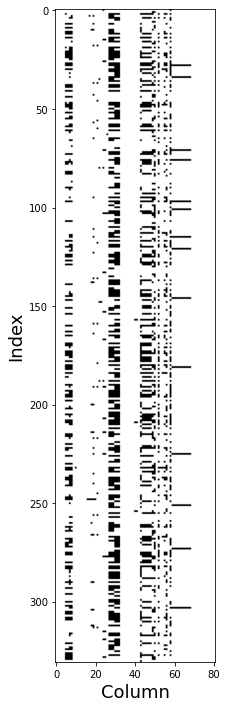

In [8]:
plt.figure(figsize = (20,12))
plt.imshow(df.isna(), cmap = 'Greys')
plt.xlabel('Column', fontsize = 18)
plt.ylabel('Index', fontsize = 18)
plt.show()

From this it is it can clearly be seen that there is structure to the missing values - as an example it is clear that it is the same 14 cities that has some missing values around columns 60-70. This is definitely something to be aware of as these columns can not be used for prediction for these cities. After investigating the geographics of the cities a method to imput missing values will be used.

### Geographical placement

Let's get an overview of the location of the cities in the data set. Using the library `folium` a world map can be generated and all the cities can be added using the latitude and longitude that was added in the preprocessing. Notice that the name of a given city can be obtained by hovering the mouse over it. The cluster ID is used to color the cities.

In [9]:
# Color dict with 12 differentiable colors
coldict = {1:'#e6194B', 2:'#3cb44b', 3:'#ffe119', 4:'#4363d8', 5:'#f58231', 6:'#42d4f4', 7:'#f032e6', 8:'#fabed4', 9:'#469990', 10:'#dcbeff', 11:'#9A6324', 12:'#fffac8'}

# Function to add a point to the map
def plot_points(map, latitude, longitude, col = 4, tooltip = None):
    for lat, lon, tt, c in zip(latitude, longitude, tooltip, col):
        folium.CircleMarker(location=[lat, lon],
                                tooltip = tt,
                                radius=1,
                                weight=4,
                                color = c).add_to(map)

# Initialize map
m = folium.Map(prefer_canvas=True)

# Add points
plot_points(m, df['Latitude'], df['Longitude'], [coldict[c] for c in df.clusterID], "<b>" + df['City'] + "</b><br>" + df['Typology'])

# Show map
m

The cities seems to be spread fairly wide around the world with a lack of cities in the more Northern of Southern part of the world. The *densest* clusters of cities in the dataset are found in the Easter part of the US, Central Europa and Eastern part of Asia. Moreover it can also be seen that there are some geographical patterns to the city types. The distribution of types is neither close to uniform. Below this is confirmed with actual figures per type:

In [10]:
df.Typology.value_counts()

Congested Emerging         59
Auto Sprawl                51
BusTransit Sprawl          47
MassTransit Moderate       30
MetroBike Emerging         27
Hybrid Giant               26
Hybrid Moderate            20
MassTransit Heavyweight    19
Congested Boomer           17
BusTransit Dense           16
Auto Innovative            14
MetroBike Giant             5
Name: Typology, dtype: int64

## Imputing missing values

As discussed previously there are a lot of missing values. A strategy to imput these based on the city type has been created. The assumption is that cities in the same cluster are more similar compared to cities in different clusters. Therefore the missing values are imputed based on a KNN from cities in the same cluster, where the distance is defined as "as-the-crow-flies" distance between two points. The is calculated with the haversine formula as the earth is a globe. The function `KNN_imputer` is implemented below where it also has a argument if the KNN should be weighted or not.

In [11]:
def KNN_imputer(df, k, Weighted = False):
    # Haversine 
    def haversine(point1, point2):
        # convert decimal degrees to radians
        lon1, lat1 = map(np.radians, point1)
        lon2, lat2 = map(np.radians, point2)

        # Deltas
        delta_lon = lon2 - lon1 
        delta_lat = lat2 - lat1 
        
        # haversine formula 
        a = np.sin(delta_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lon/2)**2
        c = 2 * np.arcsin(np.sqrt(a)) 
        r = 6371 # Radius of earth in km
        return c * r
    
    # Copy of df to return
    df_new = df.copy()

    for City in df.City:
        # Cluster of city
        sub_df = df[df.clusterID == df[df.City == City].clusterID.values[0]].set_index('City')

        # Add distance based on the haversine formula
        sub_df['Dist'] = [haversine(
                                sub_df.loc[City, ["Latitude", "Longitude"]].values, 
                                sub_df.loc[c, ["Latitude", "Longitude"]].values)
                                for c in sub_df.index]

        # Get columns where data is missing
        missing = df[df.City == City].isna().squeeze()[df[df.City == City].isna().squeeze()].index

        # Loop over all columns
        for col in missing:
            if (~sub_df[col].isna()).sum() < k:
                continue
            
            # Get k smallest distances
            knn = sub_df[[col, 'Dist']].dropna().nsmallest(k, 'Dist')

            if Weighted:
                # Change dist to weights 
                knn['Dist'] = (1/knn['Dist'])/((1/knn['Dist']).sum())
                imputed = (knn[col]*knn['Dist']).sum()
            else:
                imputed = knn[col].mean()

            df_new.loc[df_new['City'] == City, col] = imputed

    return df_new

Now a new data frame is created with imputed values and the missing values is investigated as before. A k of 4 is used as it is deemed a fair compromise.

In [12]:
df_new = KNN_imputer(df, k = 4, Weighted=True)

print(f"{len(df_new.loc[:,df_new.isna().sum()>0].isna().sum())}/{df_new.shape[1]} columns now has at least one missing value. The number of missing values per column (that has missing value(s)) is:")
df_new.loc[:,df_new.isna().sum()>0].isna().sum()

9/81 columns now has at least one missing value. The number of missing values per column (that has missing value(s)) is:


Congestion_(%)            75
Congestion_AM_Peak_(%)    75
Congestion_PM_Peak_(%)    75
Traffic_Index             84
Travel_Time_Index         84
Inefficiency_Index        84
Unemployment_Rate_(%)     56
Poverty_Rate_(%)          25
Safety_Index              25
dtype: int64

It can be seen that many columns now are free of missing values - this is though not the case for all and the reason for that is that for some *clusters* there are not enough cities that have data and as such the values can not be imputed.

Of the columns that still have missing data it is noticed that it is only the case for 25 observations for `Poverty rate` and `Safety index` which corresponds to only 8% of all observations. It is investigated which cities are missing these data points:

In [13]:
df_new[df_new['Poverty_Rate_(%)'].isna()]

,City,cityID,clusterID,Typology,Country,Car_Modeshare_(%),Public_Transit_Modeshare_(%),Bicycle_Modeshare_(%),Walking_Modeshare_(%),Gasoline_Pump_Price_(USD/liter),...,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor,Latitude,Longitude,Continent
66,Urumqi,67,12,MetroBike Emerging,China,21.700000,54.700000,28.485943,24.876591,1.16,...,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617,43.419754,87.319461,Asia
67,Hefei,68,12,MetroBike Emerging,China,42.000000,24.600000,2.700000,20.271035,1.16,...,0.406251,0.263258,0.628634,0.286017,0.527857,0.610987,0.378841,31.822809,117.221803,Asia
62,Dalian,63,12,MetroBike Emerging,China,18.988285,43.000000,16.426446,19.011487,1.16,...,0.389632,0.272460,0.688892,0.249868,0.570295,0.603667,0.317975,38.918171,121.628295,Asia
50,Chengdu,51,12,MetroBike Emerging,China,11.000000,15.000000,33.090519,26.228105,1.16,...,0.475479,0.292073,0.715386,0.432897,0.641407,0.661810,0.407573,30.662421,104.063322,Asia
47,Wuhan,48,12,MetroBike Emerging,China,26.019738,31.445670,20.102574,23.406422,1.16,...,0.863012,0.281825,0.694197,0.482784,0.548483,0.621334,0.374049,30.595105,114.299935,Asia
65,Changsha,66,12,MetroBike Emerging,China,28.447643,37.501956,3.200000,23.288756,1.16,...,0.394078,0.283940,0.685585,0.298824,0.650042,0.680049,0.285441,28.230206,112.933586,Asia
59,Jinan,60,12,MetroBike Emerging,China,22.070304,31.300217,24.251925,18.026412,1.16,...,0.391018,0.286817,0.760969,0.304203,0.563926,0.712352,0.219084,36.650701,117.114004,Asia
52,Harbin,53,12,MetroBike Emerging,China,19.457394,39.043920,12.581866,23.075198,1.16,...,0.383312,0.263262,0.744615,0.367624,0.569243,0.635807,0.306163,45.798827,126.530400,Asia
53,Shenyang,54,12,MetroBike Emerging,China,19.235288,41.998639,13.852309,21.055912,1.16,...,0.385558,0.276916,0.750081,0.309411,0.580191,0.696692,0.345283,41.674457,123.458289,Asia
70,Xiamen,71,12,MetroBike Emerging,China,32.259154,47.174450,22.831389,20.559945,1.16,...,0.395157,0.266297,0.705314,0.315237,0.526894,0.598585,0.259526,24.480107,118.085348,Asia


In [14]:
df_new[df_new['Safety_Index'].isna()]

,City,cityID,clusterID,Typology,Country,Car_Modeshare_(%),Public_Transit_Modeshare_(%),Bicycle_Modeshare_(%),Walking_Modeshare_(%),Gasoline_Pump_Price_(USD/liter),...,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor,Latitude,Longitude,Continent
66,Urumqi,67,12,MetroBike Emerging,China,21.700000,54.700000,28.485943,24.876591,1.16,...,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617,43.419754,87.319461,Asia
67,Hefei,68,12,MetroBike Emerging,China,42.000000,24.600000,2.700000,20.271035,1.16,...,0.406251,0.263258,0.628634,0.286017,0.527857,0.610987,0.378841,31.822809,117.221803,Asia
62,Dalian,63,12,MetroBike Emerging,China,18.988285,43.000000,16.426446,19.011487,1.16,...,0.389632,0.272460,0.688892,0.249868,0.570295,0.603667,0.317975,38.918171,121.628295,Asia
50,Chengdu,51,12,MetroBike Emerging,China,11.000000,15.000000,33.090519,26.228105,1.16,...,0.475479,0.292073,0.715386,0.432897,0.641407,0.661810,0.407573,30.662421,104.063322,Asia
47,Wuhan,48,12,MetroBike Emerging,China,26.019738,31.445670,20.102574,23.406422,1.16,...,0.863012,0.281825,0.694197,0.482784,0.548483,0.621334,0.374049,30.595105,114.299935,Asia
65,Changsha,66,12,MetroBike Emerging,China,28.447643,37.501956,3.200000,23.288756,1.16,...,0.394078,0.283940,0.685585,0.298824,0.650042,0.680049,0.285441,28.230206,112.933586,Asia
59,Jinan,60,12,MetroBike Emerging,China,22.070304,31.300217,24.251925,18.026412,1.16,...,0.391018,0.286817,0.760969,0.304203,0.563926,0.712352,0.219084,36.650701,117.114004,Asia
52,Harbin,53,12,MetroBike Emerging,China,19.457394,39.043920,12.581866,23.075198,1.16,...,0.383312,0.263262,0.744615,0.367624,0.569243,0.635807,0.306163,45.798827,126.530400,Asia
53,Shenyang,54,12,MetroBike Emerging,China,19.235288,41.998639,13.852309,21.055912,1.16,...,0.385558,0.276916,0.750081,0.309411,0.580191,0.696692,0.345283,41.674457,123.458289,Asia
70,Xiamen,71,12,MetroBike Emerging,China,32.259154,47.174450,22.831389,20.559945,1.16,...,0.395157,0.266297,0.705314,0.315237,0.526894,0.598585,0.259526,24.480107,118.085348,Asia


It is seen that it is only Chinese cities. Below it is checked that if there are observations in China with non missing data. 

In [15]:
len(df[df['Country'] == "China"])

30

It turns out to be the case. As we would like to be able to use these columns we assume that the Chinese cities with data are representative for the country and impute their mean values for the remaining cities.

In [16]:
# Calculate mean of values that exists
imp_Pov = df[df['Country'] == "China"]['Poverty_Rate_(%)'].mean()
imp_Saf = df[df['Country'] == "China"]['Safety_Index'].mean()

# Impute
df_new.loc[df_new['Poverty_Rate_(%)'].isna(),'Poverty_Rate_(%)'] = imp_Pov
df_new.loc[df_new['Safety_Index'].isna(),'Safety_Index'] = imp_Saf

This updated data frame is saved so it can be used for the modelling.

In [17]:
df_new.to_csv(os.path.abspath('../data/Processed/Cities_imputed.csv'))

## Correlation Analysis

The foundation for considering prediction is the fact the there are some correlation between the variables. Therefore it makes sense to consider these. Firstly all the correlations are plotted as a heatmap to get an idea of the structure. This is done below where the respons variable (CO2 emision) is shown in bold.

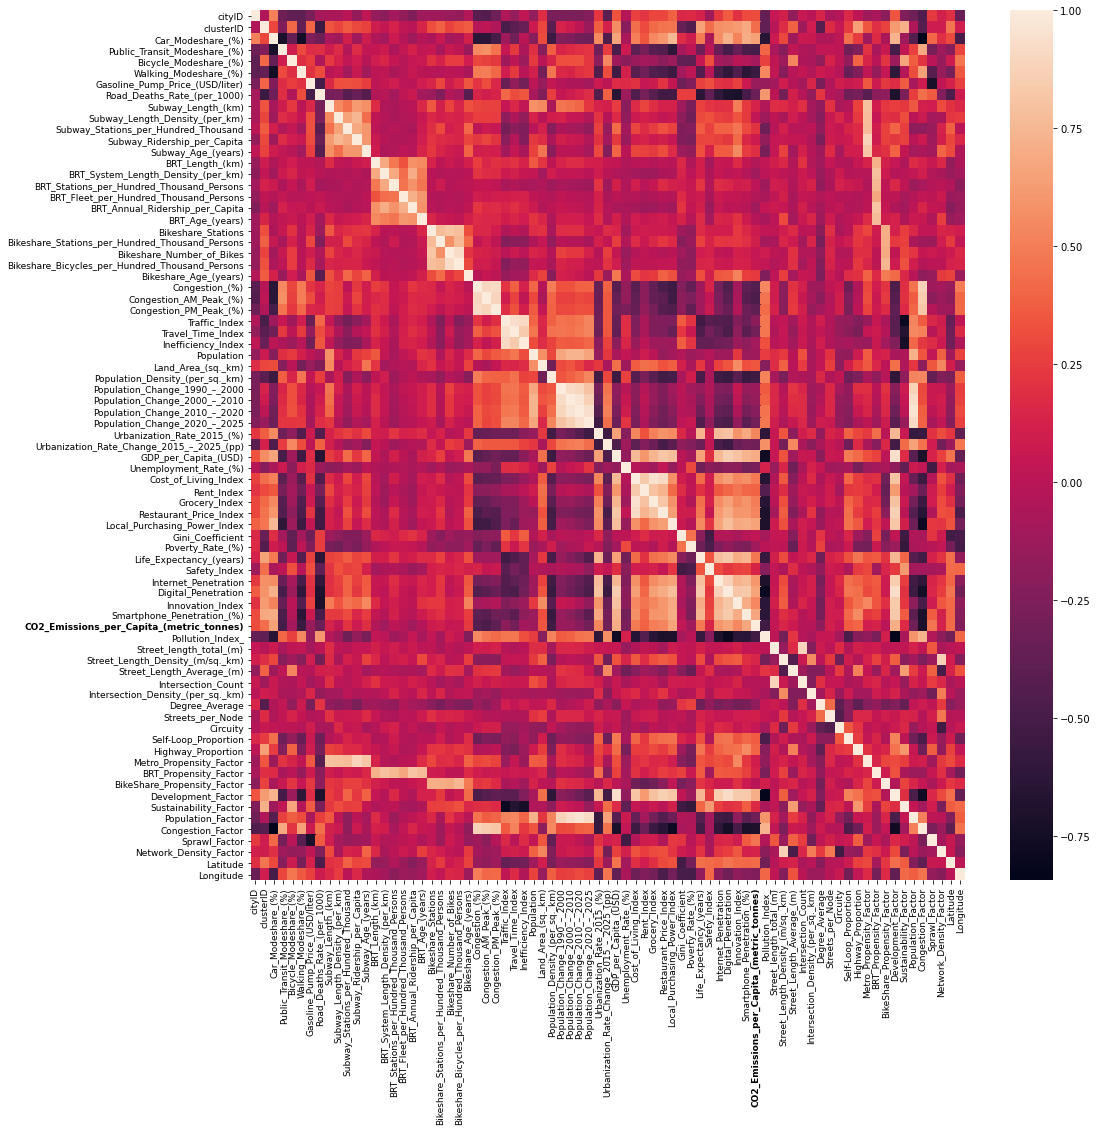

In [18]:
plt.figure(figsize = (16,16))
sns.heatmap(df_new.corr(),xticklabels=True, yticklabels=True)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

# Get bold for CO2 emision
f = ['regular']*len(df_new.columns)
f[list(df.columns).index('CO2_Emissions_per_Capita_(metric_tonnes)') - 3] = 'bold' #-3 since categorical values are not included

# Set bold for CO2 emmsion
for ticklabelx, ticklabely, fontweight in zip(plt.gca().get_xticklabels(), plt.gca().get_yticklabels(), f):
    ticklabelx.set_fontweight(fontweight)
    ticklabely.set_fontweight(fontweight)

plt.show()

Naturally the plot is very messy with more than 3000 data points. It does though tell a story of a lot of correlations in the data which is something to be aware of when it comes to making a prediction mode. A concrete example is the four variables connected to population change - they all have very high correlation with eachother which is an indication that regulization should be consindered for models if possible. 

As it is the CO2 emision that has to be predicted it makes sense to take a closer look at the correlations with all other variables which is done below:

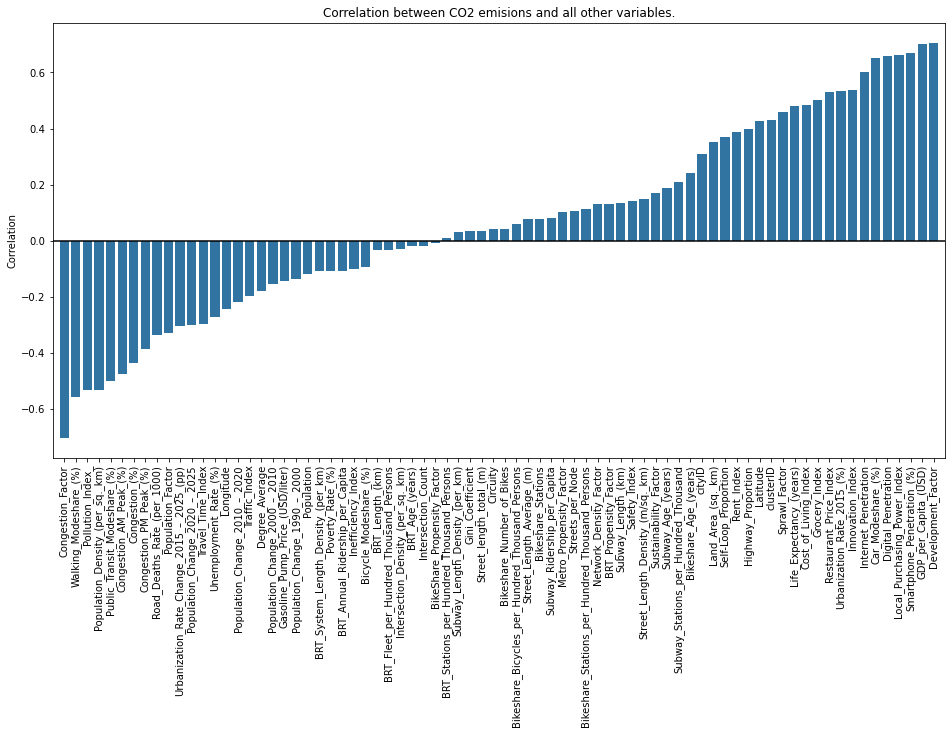

In [19]:
corr_list = df_new.corr().loc['CO2_Emissions_per_Capita_(metric_tonnes)'][df_new.corr().loc['CO2_Emissions_per_Capita_(metric_tonnes)'] <1]

# Make barplot
plt.figure(figsize = (16,8))
sns.barplot(corr_list.sort_values().index, corr_list.sort_values().values, color = "tab:blue")
plt.axhline(y=0, color = "k")
plt.title("Correlation between CO2 emisions and all other variables.")
plt.xticks(rotation = 90)
plt.xlim([-1,len(corr_list)])
plt.ylabel("Correlation")
plt.show()

In [20]:
print(corr_list.sort_values())

Congestion_Factor                 -0.702860
Walking_Modeshare_(%)             -0.557346
Pollution_Index_                  -0.533077
Population_Density_(per_sq._km)   -0.531781
Public_Transit_Modeshare_(%)      -0.500588
                                     ...   
Digital_Penetration                0.658368
Local_Purchasing_Power_Index       0.661443
Smartphone_Penetration_(%)         0.669225
GDP_per_Capita_(USD)               0.701319
Development_Factor                 0.706203
Name: CO2_Emissions_per_Capita_(metric_tonnes), Length: 76, dtype: float64


It can be seen that there are a broad spectrum of correlations from around -0.7 to 0.7. This means that using the `Developmentfactor` alone would lead to an expected $R^2$-value of around 0.5 with a linear regression. This is an interesting benchmark compared to adding even more variables.

As we have around 80 columns it is not viable to throughly analyse all of them. Instead their distribution is investigated with the built-in method `.boxplot()` from Pandas. The data is standardized first so it is on the same scale. This is shown below:

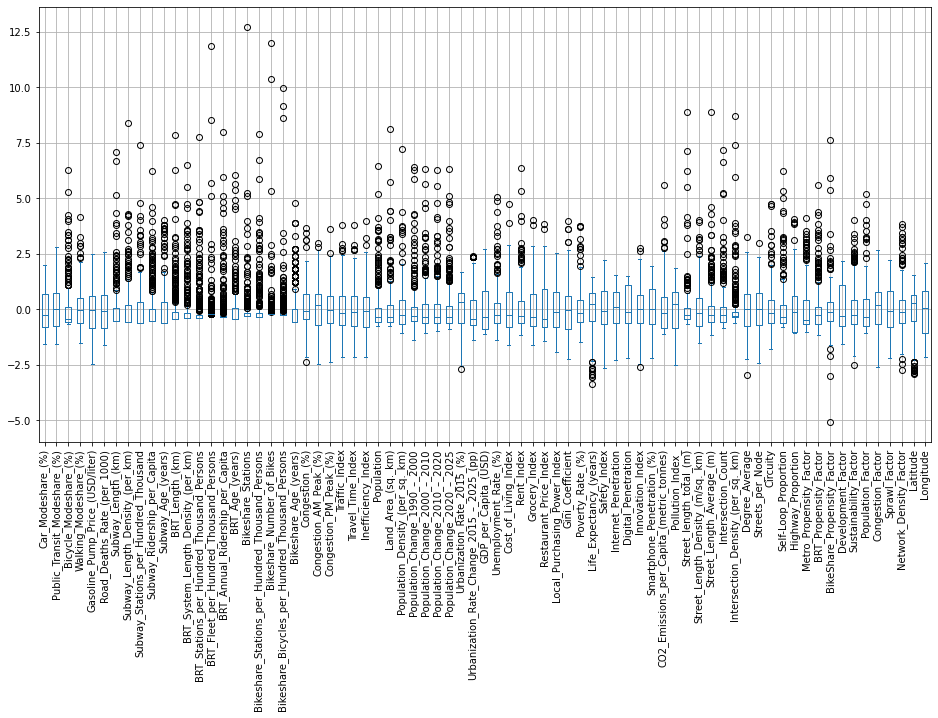

In [21]:
# Standardized data
df_stand = (df_new.drop(columns = ["City", "cityID", "Country", "Continent", "clusterID", "Typology"]) - df_new.drop(columns = ["City", "cityID", "Country", "Continent", "clusterID", "Typology"]).mean()) / df_new.drop(columns = ["City", "cityID", "Country", "Continent", "clusterID", "Typology"]).std()

# Boxplot
plt.figure(figsize = (16,8))
df_stand.boxplot(color = "#1f77b4")
plt.xticks(rotation = 90)
plt.show()

From this it becomes apparent that the distributions are vastly differen between the variables. Some are close to normal while others are very skewed having observations around 12 standard deviations away from the mean.

### PCA

Another way to investigate the intercorrelation in the data is by performing a PCA. As the data is so high dimensional it is expected that the data can be well prepresented in a lower dimensional manifold. The PCA required complete why the columns with missing values are droppen. It should though still be able to show something about the structure in the data. The standardised version from above is also used so all columns ahve same weighting.

In [22]:
# Make pca
pca = PCA()
pca.fit(df_stand.dropna(axis = 1))

PCA()

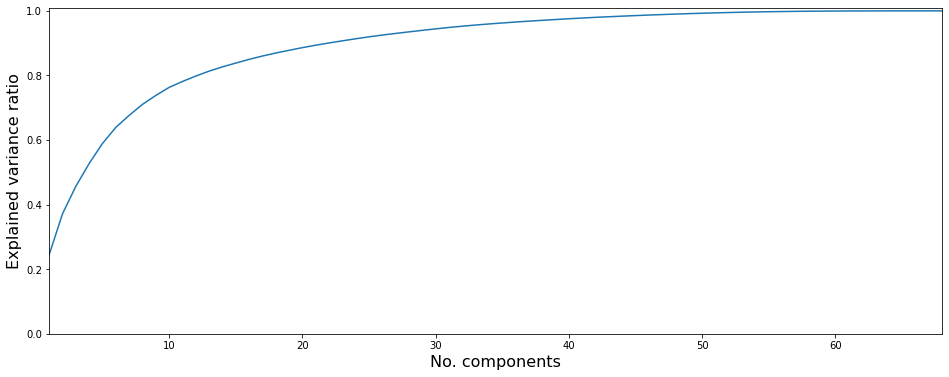



Using the 1 first principal components explains 24.509% of the variance
Using the 10 first principal components explains 76.302% of the variance
Using the 20 first principal components explains 88.609% of the variance
Using the 40 first principal components explains 97.561% of the variance


In [23]:
# Calculate cummulitative explained variance ration
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]

# Plot
plt.figure(figsize=(16,6))
plt.plot(range(1,1+len(expl)), cdf, color = '#1f77b4')
plt.xlabel("No. components", fontsize = 16)
plt.ylabel("Explained variance ratio", fontsize = 16)
plt.xlim(1,len(expl))
plt.ylim(0,1.01)
plt.show()

# Print results for some selected values
print('\n')
get_expl_var = [1,10,20,40]
for comp in get_expl_var:
    print(f'Using the {comp} first principal components explains {100*cdf[comp-1]:.3f}% of the variance')

The PCA plot reveals that the data can be represented okay on a lower dimensional manifold - as can be seen the first component alone explains 25% and using 10 will give 76%. This is though not surprising based on the previous correlation investigation that revealed clear intercorrelation in the data.

Based on these results it could be discussed in a *principal component regression* would make sense. It will though not be investigated further as regularization instead will be considered to deal with the intercorrelation in the data when modelling.

Let's just have a look at the first principal components and its loadings on the variables from the data set - as such we should be able to get and idea what makes it up:

In [34]:
{k: v for k, v in sorted(dict(zip(df_stand.dropna(axis = 1).columns, pca.components_[0])).items(), key=lambda item: item[1])}

{'Development_Factor': -0.240497542761575,
 'Digital_Penetration': -0.23227124047427217,
 'GDP_per_Capita_(USD)': -0.2248499361594707,
 'Internet_Penetration': -0.21104108735224225,
 'Smartphone_Penetration_(%)': -0.20550418126337047,
 'Restaurant_Price_Index': -0.2021271143450788,
 'Innovation_Index': -0.19970449005984778,
 'Local_Purchasing_Power_Index': -0.19635597367993698,
 'Urbanization_Rate_2015_(%)': -0.193820039124179,
 'Life_Expectancy_(years)': -0.19106975165631906,
 'Cost_of_Living_Index': -0.1867136762762864,
 'Grocery_Index': -0.1818638590382776,
 'Car_Modeshare_(%)': -0.1817785595142972,
 'CO2_Emissions_per_Capita_(metric_tonnes)': -0.17369416283479513,
 'Rent_Index': -0.13388835460054982,
 'Self-Loop_Proportion': -0.12532690544952593,
 'Latitude': -0.11451029577149377,
 'Subway_Stations_per_Hundred_Thousand': -0.11072914881564308,
 'Subway_Age_(years)': -0.10463422845080807,
 'Bikeshare_Age_(years)': -0.10262524708982494,
 'Highway_Proportion': -0.10166374458383506,
 'S

Looking at the variables with the lowest values they all relate to how the developed a given city is. A handfull of the variables with the largest loadings are related the the population and the change amongst with some others. This means that a city will score high on the first principac component if is not very developed but has grown a lot in population since 1990.